<a href="https://colab.research.google.com/github/mepky/Audio-signal-analysis/blob/master/feature_extraction_of_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving human.wav to human.wav
User uploaded file "human.wav" with length 1224492 bytes


In [0]:
import IPython.display as ipd
ipd.Audio('human.wav')

In [0]:
!pip install librosa

In [0]:
import librosa
data, sampling_rate = librosa.load('human.wav')

In [0]:

import librosa
y2, sr2 = librosa.load('human.wav')

D = librosa.stft(y2, hop_length=512   )

In [0]:

y_orig, sr_orig = librosa.load(librosa.util.example_audio_file(),
                     sr=None)
print(len(y_orig), sr_orig)

2710336 44100


In [0]:
sr = 22050

y = librosa.resample(y_orig, sr_orig, sr)

print(len(y), sr)

1355168 22050


In [0]:
print(librosa.samples_to_time(len(y), sr))

61.45886621315193


In [0]:
D = librosa.stft(y)
print(D.shape, D.dtype)

(1025, 2647) complex64


In [0]:
import numpy as np
S, phase = librosa.magphase(D)
print(S.dtype, phase.dtype, np.allclose(D, S * phase))

float32 complex64 True


In [0]:
C = librosa.cqt(y, sr=sr)

print(C.shape, C.dtype)

(84, 2647) complex128


In [0]:

melspec = librosa.feature.melspectrogram(y=y, sr=sr)

# Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr)

print(np.allclose(melspec, melspec_stft))

True


In [0]:
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

In [0]:
%matplotlib inline

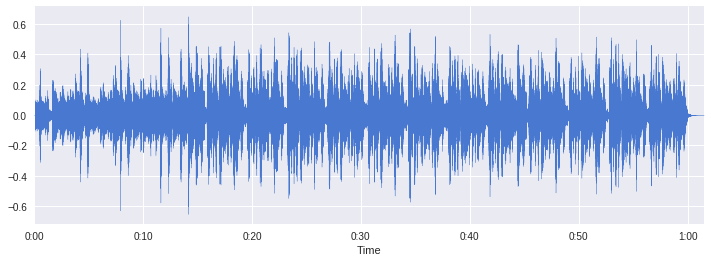

In [0]:
import librosa.display
plt.figure(figsize=(12,4))
librosa.display.waveplot(y=y, sr=sr)

In [0]:
max(y)

0.6505959

In [0]:
min(y)

-0.7105063

In [0]:
np.mean(y)

-2.3661802e-05

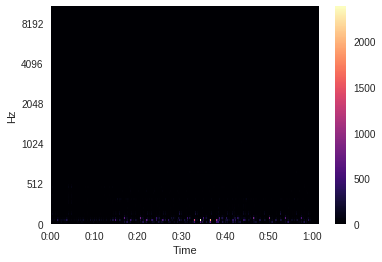

In [0]:
plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()

In [0]:
X = librosa.feature.duration()

plt.figure()

librosa.display.specshow(x,x_axis='Time',y_axis='')

AttributeError: ignored